## 災害  
粟野翔



データを取得

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
emdat = pd.read_csv('emdat.csv')

In [2]:
# Explore the data
emdat.head()  # Display the first few rows

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


# 分析


いろいろな災害がありますが、どの災害が人の命を一番奪っているのでしょうか？  
日本では東日本大震災が多くの命を奪っています。では世界を含めたらどうなるのか？

【死者数トップ10の災害】
           Country  Start Year Disaster Type  Total Deaths
287          China        1931         Flood     3700000.0
255          China        1928       Drought     3000000.0
134   Soviet Union        1917      Epidemic     2500000.0
155          India        1920      Epidemic     2000000.0
847          China        1959         Flood     2000000.0
457     Bangladesh        1943       Drought     1900000.0
1147         India        1965       Drought     1500000.0
441          India        1942       Drought     1500000.0
60           China        1909      Epidemic     1500000.0
54           India        1907      Epidemic     1300000.0


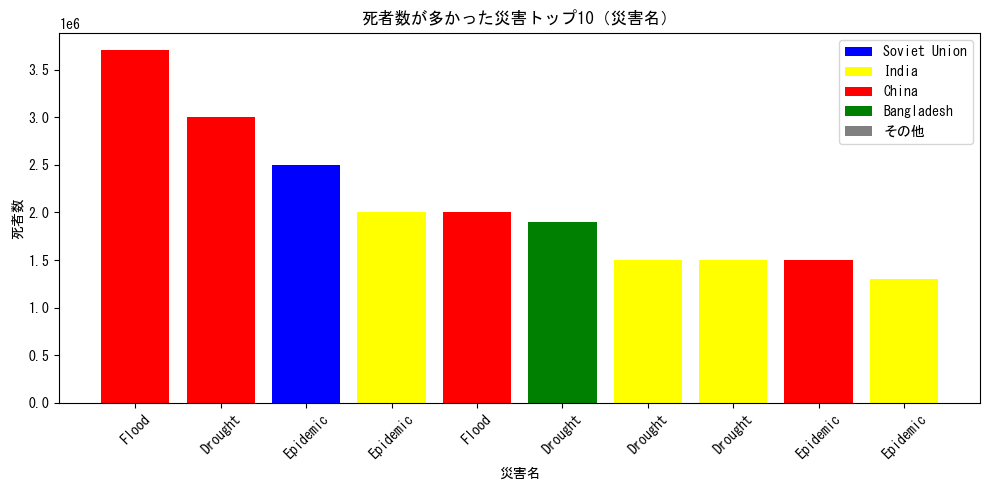

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'

df = pd.read_csv("emdat.csv")

# 死者数トップ10
df_deaths = df[df["Total Deaths"].notnull()]
deaths_top = df_deaths.sort_values("Total Deaths", ascending=False).head(10)

print("【死者数トップ10の災害】")
print(deaths_top[["Country", "Start Year", "Disaster Type", "Total Deaths"]])

# 国ごとの色設定
color_map = {
    "Soviet Union": "blue",
    "India": "yellow",
    "China": "red",
    "Bangladesh": "green"
}

colors = [color_map.get(country, "gray") for country in deaths_top["Country"]]

plt.figure(figsize=(10,5))
plt.bar(
    range(10),
    deaths_top["Total Deaths"],
    color=colors
)

# 災害名をX軸ラベルに
plt.xticks(range(10), deaths_top["Disaster Type"], rotation=45)
plt.title("死者数が多かった災害トップ10（災害名）")
plt.xlabel("災害名")
plt.ylabel("死者数")

# 凡例の追加
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=country) for country, color in color_map.items()]
legend_elements.append(Patch(facecolor="gray", label="その他"))
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()


死者数が多かった災害のトップ10をまとめました。  
洪水、伝染病、干ばつが多くの命を奪っています。またアジアでこれらが多く起こっていることが分かります。

【年ごとの災害件数トレンド】
Start Year
1900     7
1901     2
1902    10
1903    12
1904     4
Name: count, dtype: int64


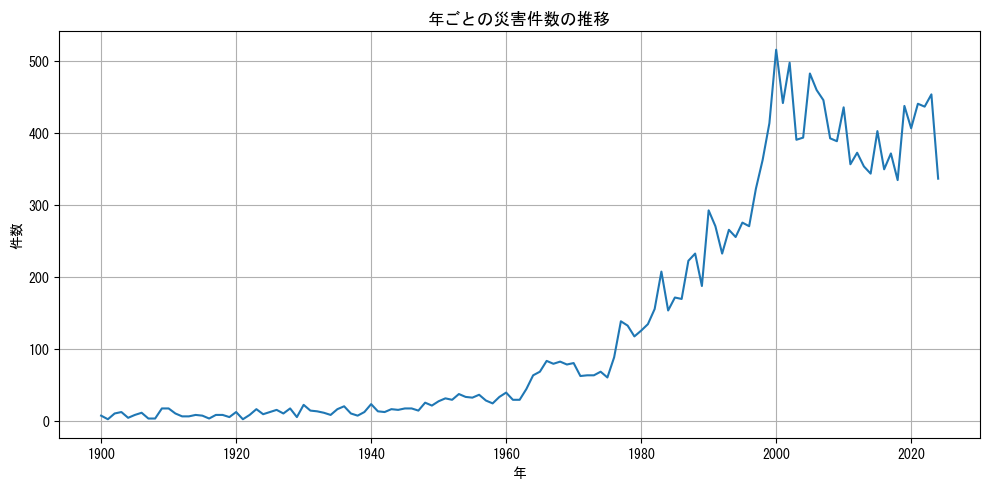

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'

df = pd.read_csv("emdat.csv")

# 年ごとの件数
year_counts = df["Start Year"].value_counts().sort_index()

print("【年ごとの災害件数トレンド】")
print(year_counts.head())

plt.figure(figsize=(10,5))
year_counts.plot(kind="line")
plt.title("年ごとの災害件数の推移")
plt.xlabel("年")
plt.ylabel("件数")
plt.grid(True)
plt.tight_layout()
plt.show()


【国別の災害件数トップ10】
Country
United States of America    1172
China                       1023
India                        785
Philippines                  710
Indonesia                    636
Japan                        391
Bangladesh                   368
Mexico                       311
Brazil                       289
Viet Nam                     272
Name: count, dtype: int64


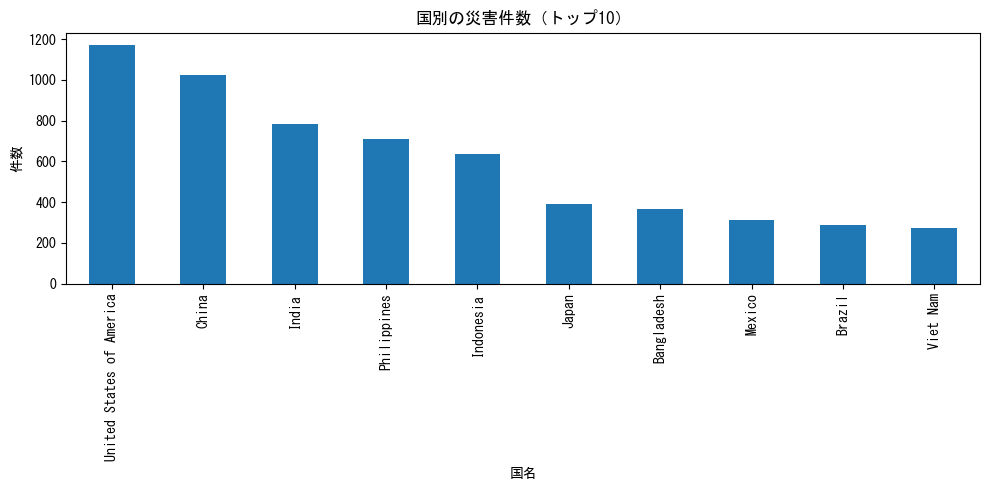

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'

df = pd.read_csv("emdat.csv")

# 国別件数
country_counts = df["Country"].value_counts()

print("【国別の災害件数トップ10】")
print(country_counts.head(10))

plt.figure(figsize=(10,5))
country_counts.head(10).plot(kind="bar")
plt.title("国別の災害件数（トップ10）")
plt.xlabel("国名")
plt.ylabel("件数")
plt.tight_layout()
plt.show()


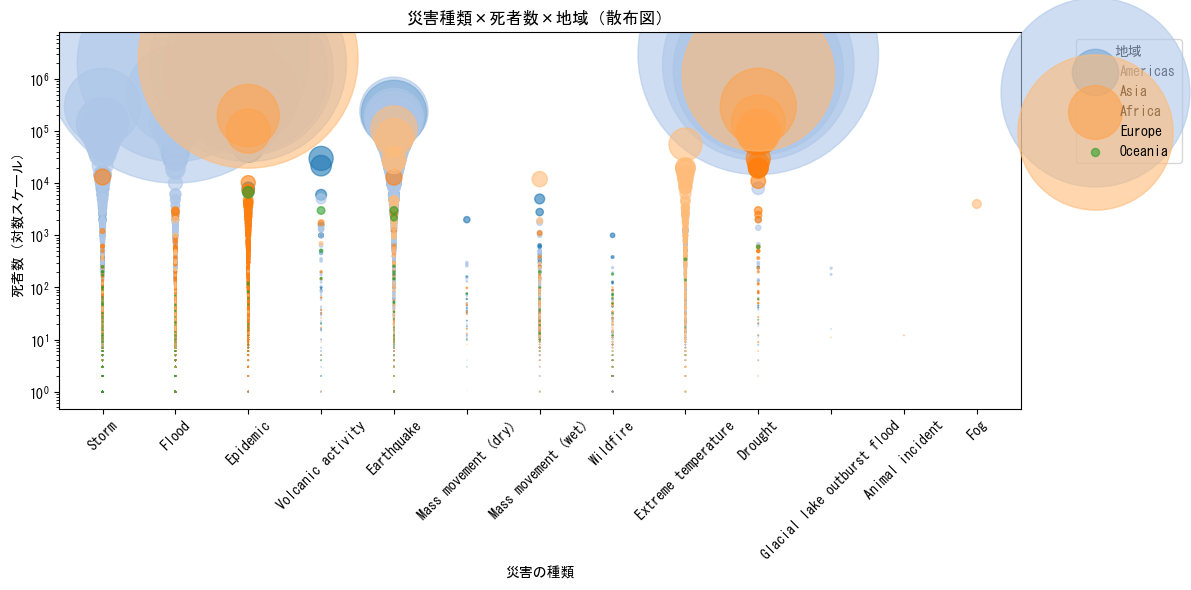

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'

# データ読み込み
df = pd.read_csv("emdat.csv")

# Total Deaths があるデータだけ
df_deaths = df[df["Total Deaths"].notnull()]

# 散布図作成
plt.figure(figsize=(12,6))

# 地域ごとに色分け
regions = df_deaths["Region"].unique()
colors = plt.cm.tab20.colors  # カラーマップ
region_color_map = {region: colors[i % len(colors)] for i, region in enumerate(regions)}

# 各災害ごとの散布点を作成
for region in regions:
    subset = df_deaths[df_deaths["Region"] == region]
    plt.scatter(
        subset["Disaster Type"],  # X軸：災害種類
        subset["Total Deaths"],   # Y軸：死者数
        s=subset["Total Deaths"]/100,  # 点の大きさを死者数で表現
        color=region_color_map[region],
        alpha=0.6,
        label=region
    )

plt.xticks(rotation=45)
plt.yscale('log')  # 死者数の幅が大きい場合、対数表示で見やすく
plt.title("災害種類×死者数×地域（散布図）")
plt.xlabel("災害の種類")
plt.ylabel("死者数（対数スケール）")
plt.legend(title="地域", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


凡例の円が大きすぎる…  
凡例は円ではなく色付きのタグに変更します！

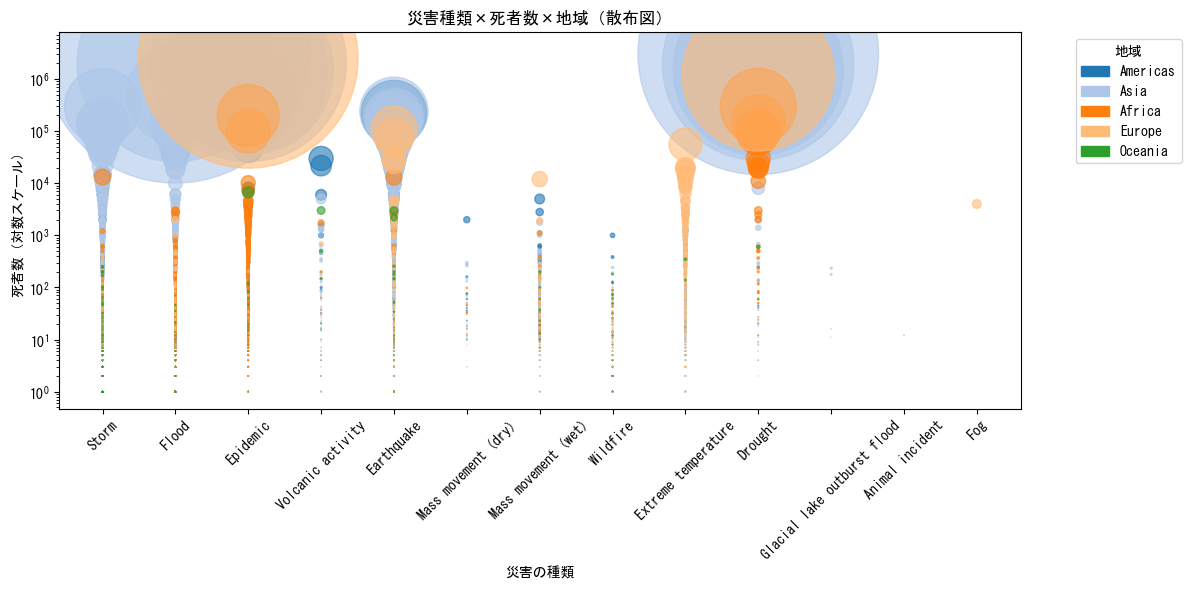

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams['font.family'] = 'MS Gothic'

df = pd.read_csv("emdat.csv")
df_deaths = df[df["Total Deaths"].notnull()]

plt.figure(figsize=(12,6))

# 地域ごとに色分け
regions = df_deaths["Region"].unique()
colors = plt.cm.tab20.colors
region_color_map = {region: colors[i % len(colors)] for i, region in enumerate(regions)}

# 散布図作成（点の大きさは死者数で可変）
for region in regions:
    subset = df_deaths[df_deaths["Region"] == region]
    plt.scatter(
        subset["Disaster Type"],
        subset["Total Deaths"],
        s=subset["Total Deaths"]/100,  # 点の大きさは死者数
        color=region_color_map[region],
        alpha=0.6
    )

plt.xticks(rotation=45)
plt.yscale('log')
plt.title("災害種類×死者数×地域（散布図）")
plt.xlabel("災害の種類")
plt.ylabel("死者数（対数スケール）")

# ===== 凡例を作る（円の大きさを統一） =====
handles = [mpatches.Patch(color=region_color_map[region], label=region) for region in regions]
plt.legend(handles=handles, title="地域", bbox_to_anchor=(1.05,1), loc='upper left')

plt.tight_layout()
plt.show()


円の色が薄く分かりずらいですね…アジアが重なってしまうとアメリカと変わらなくなってしまいます。

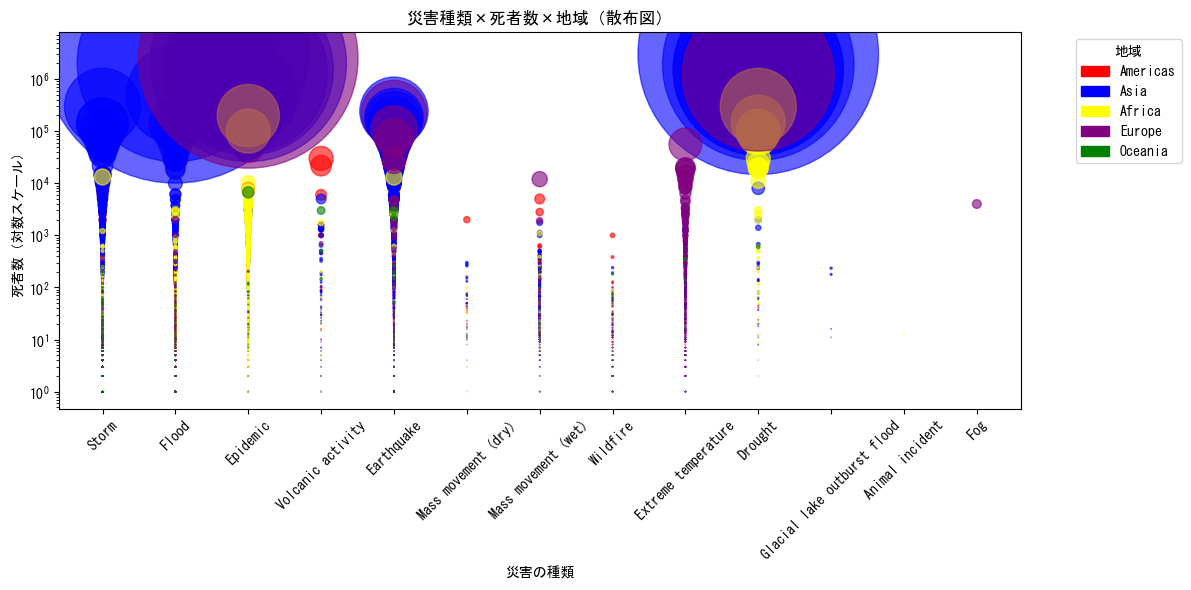

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams['font.family'] = 'MS Gothic'

df = pd.read_csv("emdat.csv")
df_deaths = df[df["Total Deaths"].notnull()]

plt.figure(figsize=(12,6))

# 地域ごとの色を固定
region_color_map = {
    "Americas": "red",
    "Asia": "blue",
    "Africa": "yellow",
    "Europe": "purple",
    "Oceania": "green"
}

# 散布図作成（点の大きさは死者数で可変）
for region, color in region_color_map.items():
    subset = df_deaths[df_deaths["Region"] == region]
    plt.scatter(
        subset["Disaster Type"],
        subset["Total Deaths"],
        s=subset["Total Deaths"]/100,  # 点の大きさは死者数
        color=color,
        alpha=0.6
    )

plt.xticks(rotation=45)
plt.yscale('log')
plt.title("災害種類×死者数×地域（散布図）")
plt.xlabel("災害の種類")
plt.ylabel("死者数（対数スケール）")

# ===== 凡例を作る（円の大きさは統一） =====
handles = [mpatches.Patch(color=color, label=region) for region, color in region_color_map.items()]
plt.legend(handles=handles, title="地域", bbox_to_anchor=(1.05,1), loc='upper left')

plt.tight_layout()
plt.show()


# おお  
この散布図は各災害ごとの死者数と起こった地域を表しています。  
y軸の数値が大きくなると死者数が大きい災害なのですが、死者数が多いものは円を大きくして視覚的に分かりやすくしました。  


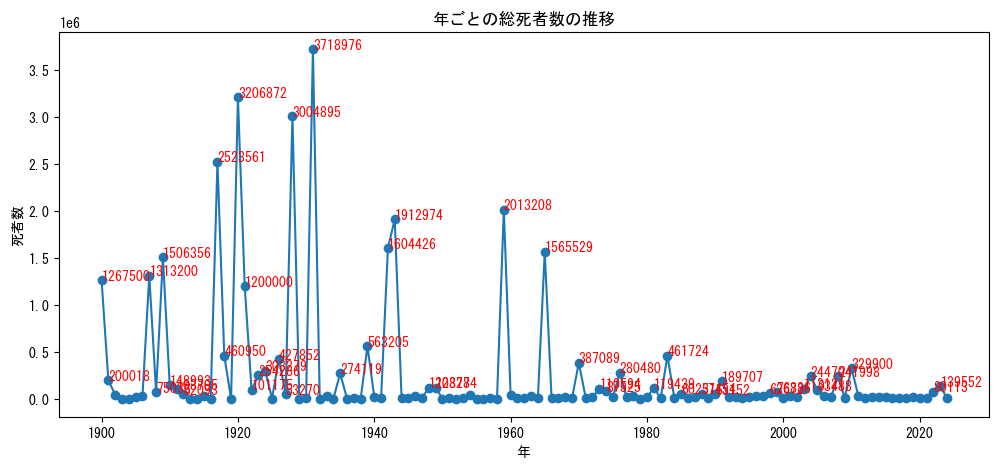

In [15]:
year_deaths = df.groupby("Start Year")["Total Deaths"].sum()
plt.figure(figsize=(12,5))
plt.plot(year_deaths.index, year_deaths.values, marker='o')
plt.title("年ごとの総死者数の推移")
plt.xlabel("年")
plt.ylabel("死者数")
# 異常値を赤で強調
for year, deaths in year_deaths.items():
    if deaths > 50000:  # 任意の閾値
        plt.text(year, deaths, str(int(deaths)), color='red')
plt.show()


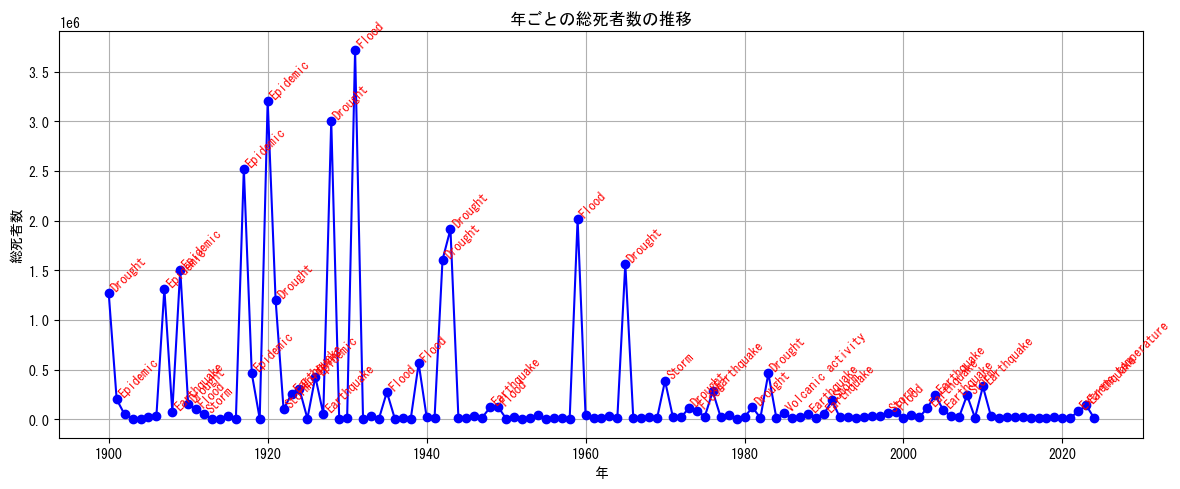

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'

# データ読み込み
df = pd.read_csv("emdat.csv")
df_deaths = df[df["Total Deaths"].notnull()]

# 年ごとの総死者数を集計
year_deaths = df_deaths.groupby("Start Year")["Total Deaths"].sum()

plt.figure(figsize=(12,5))
plt.plot(year_deaths.index, year_deaths.values, marker='o', color='blue')
plt.title("年ごとの総死者数の推移")
plt.xlabel("年")
plt.ylabel("総死者数")
plt.grid(True)

# ▼ 死者数が大きい災害に名前ラベルを追加
threshold = 50000  # 任意の閾値（例：5万人以上）
for year in year_deaths.index:
    total = year_deaths[year]
    if total >= threshold:
        # その年で最も死者数の多い災害名を取得
        top_disaster = df_deaths[df_deaths["Start Year"] == year].sort_values("Total Deaths", ascending=False).iloc[0]
        disaster_name = top_disaster["Disaster Type"]
        plt.text(year, total, disaster_name, color='red', fontsize=9, rotation=45, ha='left', va='bottom')

plt.tight_layout()
plt.show()


ネットワーク図を保存しました: subtype_cooccurrence_network.png


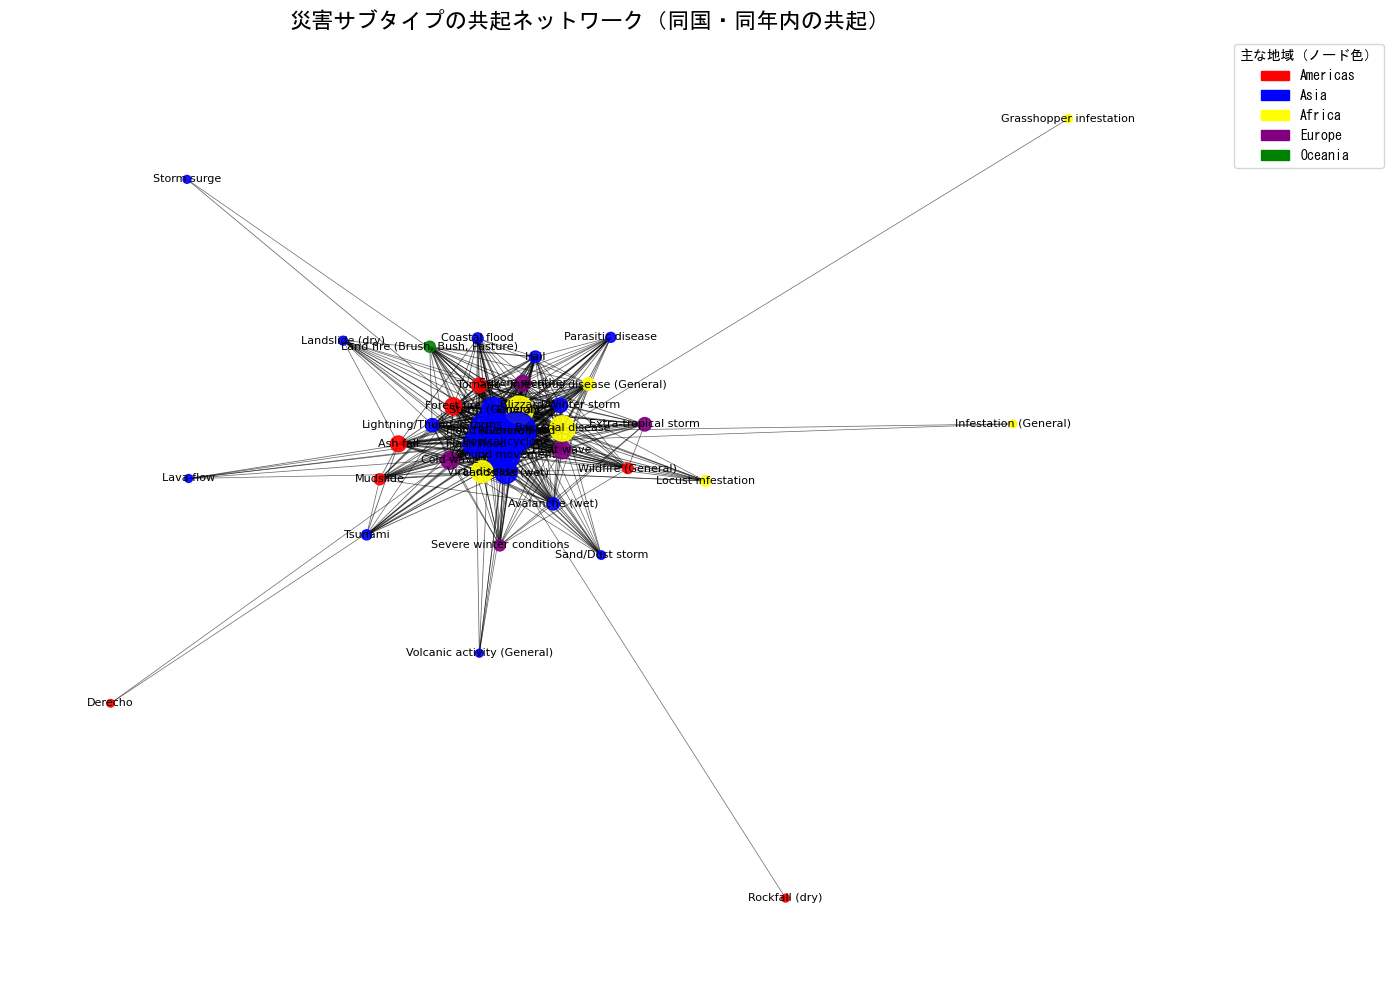


上位の共起ペア（weightでソート）:
        subtype_a        subtype_b  weight
   Riverine flood Tropical cyclone     338
  Flood (General) Tropical cyclone     337
  Ground movement   Riverine flood     279
  Flood (General)  Ground movement     265
  Flood (General)   Riverine flood     256
      Flash flood   Riverine flood     236
      Flash flood  Flood (General)     225
  Ground movement Tropical cyclone     221
Bacterial disease   Riverine flood     218
          Drought   Riverine flood     208
  Flood (General)  Landslide (wet)     189
   Riverine flood  Storm (General)     177
  Storm (General) Tropical cyclone     177
          Drought  Flood (General)     177
  Flood (General)  Storm (General)     176
  Landslide (wet)   Riverine flood     174
   Riverine flood    Viral disease     164
      Flash flood Tropical cyclone     159
  Ground movement  Landslide (wet)     154
          Drought Tropical cyclone     152

上位ノード（サブタイプ）:
Riverine flood: 1618
Flood (General): 1614
Tropical cyclone:

In [1]:
# 災害サブタイプ共起ネットワーク（フル）
# VSCodeでそのまま実行できます
# 必要パッケージ: pandas, networkx, matplotlib
# インストール: pip install pandas networkx matplotlib

import pandas as pd
import itertools
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'MS Gothic'  # 日本語フォント

# -----------------------
# 設定（必要ならここを変更）
# -----------------------
CSV_PATH = "emdat.csv"
GROUP_BY = "Country"     # 同時発生の単位: "Country" または "Region"
YEAR_COL = "Start Year"  # 年列名
SUBTYPE_COL = "Disaster Subtype"  # サブタイプ列名（無ければ "Disaster Type" に変更）
REGION_COL = "Region"    # 地域列名
MIN_EDGE_WEIGHT = 3      # この回数未満の共起は描画しない（雑音除去）
TOP_N_NODES = 40         # 描画する上位ノード数（Noneで制限なし）
OUTPUT_PNG = "subtype_cooccurrence_network.png"
# -----------------------

# 読み込み
df = pd.read_csv(CSV_PATH)

# サブタイプの存在チェック（無ければ Disaster Type を使う）
if SUBTYPE_COL not in df.columns or df[SUBTYPE_COL].isnull().all():
    print(f"注意: 列 {SUBTYPE_COL} が見つからないか空です。Disaster Type を代わりに使用します。")
    SUBTYPE_COL = "Disaster Type"

# 必要な列だけ抽出し NA を除去
df_use = df[[GROUP_BY, YEAR_COL, SUBTYPE_COL, REGION_COL, "Total Deaths"]].dropna(subset=[GROUP_BY, YEAR_COL, SUBTYPE_COL])

# 年は整数に（文字列の場合対応）
df_use[YEAR_COL] = df_use[YEAR_COL].astype(int)

# -----------------------
# 1) 共起ペアのカウント（国×年ごとに同時に出現したサブタイプの全ペアを集計）
# -----------------------
from collections import Counter, defaultdict

edge_counter = Counter()
node_counter = Counter()            # 各サブタイプの出現回数
node_region_counter = defaultdict(Counter)  # 各サブタイプがどの地域で多いか数える

# グルーピング単位: country + year（または region+year に変更可能）
group_keys = [GROUP_BY, YEAR_COL]

for _, group in df_use.groupby(group_keys):
    # 同じ国・同年に出たサブタイプのユニーク集合
    subtypes = sorted(group[SUBTYPE_COL].unique())
    # ノード出現数を更新（同グループ内の1 出現を1カウントとする）
    for s in subtypes:
        node_counter[s] += 1
        # そのサブタイプの出現している地域をカウント（最終的に最頻地域を色分けに使う）
        # group は同じ国・年のレコードの集合。region は複数ある場合があるので最も多い1つを選ぶ。
        # ここでは group の REGION_COL 値の最頻値を取る:
        try:
            most_common_region = group[REGION_COL].mode().iloc[0]
        except Exception:
            most_common_region = "Unknown"
        node_region_counter[s][most_common_region] += 1

    # 全てのペアを作り、edge_counter を増加
    for a, b in itertools.combinations(subtypes, 2):
        if a == b:
            continue
        # 順序を揃えてキー化
        key = tuple(sorted((a, b)))
        edge_counter[key] += 1

# -----------------------
# 2) ノード・エッジの DataFrame 化・フィルタリング
# -----------------------
# エッジを DataFrame に
edges_df = pd.DataFrame(
    [(a, b, w) for (a, b), w in edge_counter.items()],
    columns=["subtype_a", "subtype_b", "weight"]
)

# 閾値でフィルタ（雑音除去）
edges_df = edges_df[edges_df["weight"] >= MIN_EDGE_WEIGHT]

# ノードリストを得る（エッジに出現するノードのみ）
nodes_from_edges = set(edges_df["subtype_a"]).union(set(edges_df["subtype_b"]))

# もし TOP_N_NODES が指定されていれば、node_counter の上位 N を使い、edges も絞る
if TOP_N_NODES is not None:
    top_nodes = set([n for n, _ in node_counter.most_common(TOP_N_NODES)])
    # ノードが top_nodes に含まれるエッジだけ残す
    edges_df = edges_df[edges_df["subtype_a"].isin(top_nodes) & edges_df["subtype_b"].isin(top_nodes)]
    nodes_from_edges = set(edges_df["subtype_a"]).union(set(edges_df["subtype_b"]))

# 最終ノード一覧と出現数（ノードサイズ用）
final_nodes = list(nodes_from_edges)
node_sizes = {n: node_counter.get(n, 1) for n in final_nodes}

# ノードの代表地域（最頻地域）を決定
node_main_region = {}
for n in final_nodes:
    if node_region_counter[n]:
        main_region = node_region_counter[n].most_common(1)[0][0]
    else:
        main_region = "Unknown"
    node_main_region[n] = main_region

# -----------------------
# 3) カラー設定（地域ごと）
# -----------------------
region_color_map = {
    "Americas": "red",
    "Asia": "blue",
    "Africa": "yellow",
    "Europe": "purple",
    "Oceania": "green",
    # データによって表記ゆれがある場合に備えて少し拡張
    "America": "red",
    "North America": "red",
    "South America": "red",
    "Unknown": "gray"
}

# ノード色配列を作成
node_colors = []
for n in final_nodes:
    region = node_main_region.get(n, "Unknown")
    color = region_color_map.get(region, "gray")
    node_colors.append(color)

# -----------------------
# 4) ネットワーク作成（NetworkX）
# -----------------------
G = nx.Graph()
# ノード追加（size属性・region属性）
for n in final_nodes:
    G.add_node(n, size=node_sizes.get(n, 1), region=node_main_region.get(n, "Unknown"))

# エッジ追加（weight属性）
for _, row in edges_df.iterrows():
    a, b, w = row["subtype_a"], row["subtype_b"], row["weight"]
    if a in final_nodes and b in final_nodes:
        G.add_edge(a, b, weight=w)

# -----------------------
# 5) 描画（レイアウト・サイズスケール・ラベル）
# -----------------------
plt.figure(figsize=(14, 10))
# レイアウト：力学レイアウト（見栄えが良い）
pos = nx.spring_layout(G, k=0.5, seed=42)  # k を変えると広がりが変わる

# ノードサイズのスケーリング（見やすさ調整）
sizes = [G.nodes[n]['size'] for n in G.nodes()]
# サイズのスケールを調整（最小30〜最大800）
min_size, max_size = 30, 800
s_min, s_max = min(sizes), max(sizes)
if s_min == s_max:
    node_draw_sizes = [ (min_size + max_size)/2 ] * len(sizes)
else:
    node_draw_sizes = [min_size + ( (s - s_min)/(s_max - s_min) ) * (max_size - min_size) for s in sizes]

# エッジ幅は重みに比例（視覚化のためスケール調整）
edge_weights = [d['weight'] for (u,v,d) in G.edges(data=True)]
if edge_weights:
    e_min, e_max = min(edge_weights), max(edge_weights)
    # 幅は 0.5 〜 6 の範囲
    if e_min == e_max:
        edge_widths = [2.0]*len(edge_weights)
    else:
        edge_widths = [0.5 + ( (w - e_min)/(e_max - e_min) ) * 5.5 for w in edge_weights]
else:
    edge_widths = []

# ノードを色で描画
nx.draw_networkx_nodes(G, pos,
                       node_size=node_draw_sizes,
                       node_color=node_colors,
                       alpha=0.9)

# エッジを描画
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.6)

# ラベル（ノード名）を描画（重なりを避けるためフォントサイズを小さめに）
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("災害サブタイプの共起ネットワーク（同国・同年内の共起）", fontsize=16)

# 右側に地域の凡例を手動で作る
import matplotlib.patches as mpatches
legend_handles = []
seen_regions = set(node_main_region.values())
for r, c in region_color_map.items():
    if r in seen_regions:
        legend_handles.append(mpatches.Patch(color=c, label=r))
# ソートして凡例表示（表示したい地域だけ）
plt.legend(handles=legend_handles, title="主な地域（ノード色）", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axis('off')
plt.tight_layout()
plt.savefig(OUTPUT_PNG, dpi=300)
print(f"ネットワーク図を保存しました: {OUTPUT_PNG}")
plt.show()

# -----------------------
# 6) 補助情報の出力（テーブル）
# -----------------------
# 上位の共起ペアを出力
print("\n上位の共起ペア（weightでソート）:")
print(edges_df.sort_values("weight", ascending=False).head(20).to_string(index=False))

# 上位ノード（出現数）
print("\n上位ノード（サブタイプ）:")
for n, cnt in node_counter.most_common(30):
    print(f"{n}: {cnt}")


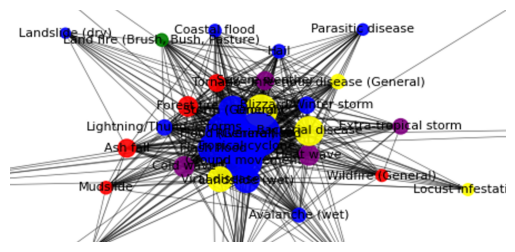

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 画像を読み込む
img = mpimg.imread("map2.png")

# 表示
plt.imshow(img)
plt.axis("off")
plt.show()
